In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

C:\Users\datan\AppData\Local\Temp\ipykernel_9996\3790897354.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
cities = pd.read_csv("california_cities.csv")
cities.head()
#latd: lattitude
#longd: longtitude

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


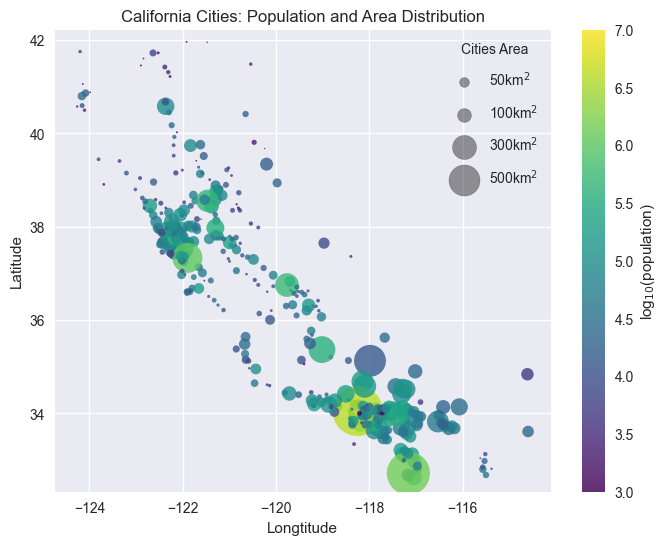

In [24]:
#Extract latd and longd
lat, lon = cities['latd'], cities['longd']

population, area = cities['population_total'], cities['area_total_km2']
#plot using pyplot API
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8,6))
plt.scatter(lon, lat,
            c = np.log10(population), cmap = 'viridis',#log10: To make clear of value
            s = area, linewidths=0,alpha=0.8);#linewidths: the thick of border of dot, alpha: Opacity

plt.axis('equal');
plt.xlabel('Longtitude');
plt.ylabel('Latitude');
plt.colorbar(label = 'log$_{10}$(population)');
plt.clim(3,7);#limit color bar
plt.title("California Cities: Population and Area Distribution");

#Create a legend of cities's size:
area_range = [50,100,300,500]
for area in area_range:
    plt.scatter([],[], s=area, c='k', alpha=0.4,
                label = str(area) + "km$^2$");
#Plt.scatter function requires at least 2 pairs of square bracket. First for represent the x and y coordinates of the point on plot,
#The second pair of square brackets contains the formatting parameters for the plotted points.
plt.legend(labelspacing=1, title = "Cities Area");